# Feed-forward neural network

In [1]:
import torch
import numpy as np
import pandas as pd

from torch import nn
import torchvision

import torch.nn.functional as F
from sklearn.datasets import make_blobs

from torch import optim

import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import torch.nn.functional as F
from torch.autograd import Variable

from tqdm import tqdm

In [4]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(1,1)
        print(self.fc)
        self.relu = nn.ReLU()

    def forward(self, x):
        print(x)
        output = self.fc(x)
        print(output)
        output = self.relu(output)
        output = max(0.1, 0.5)
        print(output)
        return output

## Материалы лекции

In [5]:
perc = Perceptron()
print(perc)

Linear(in_features=1, out_features=1, bias=True)
Perceptron(
  (fc): Linear(in_features=1, out_features=1, bias=True)
  (relu): ReLU()
)


In [6]:
# Так выглядит инференс нейронной сети по входным данным
perc(torch.FloatTensor([5])), perc(torch.FloatTensor([-15]))

tensor([5.])
tensor([2.8908], grad_fn=<AddBackward0>)
0.5
tensor([-15.])
tensor([-4.8849], grad_fn=<AddBackward0>)
0.5


(0.5, 0.5)

In [7]:
perc.fc.weight, perc.fc.bias

(Parameter containing:
 tensor([[0.3888]], requires_grad=True),
 Parameter containing:
 tensor([0.9469], requires_grad=True))

In [8]:
class Feedforward(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Feedforward, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.sigmoid(output)
        return output

In [9]:
class Perceptron(nn.Module):
    def __init__(self, input_dim, output_dim, activation="relu"):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        x = self.fc(x)
        if activation=="relu":
            return F.relu(x)
        if activation=="sigmoid":
            return F.sigmoid(x)
        raise RuntimeError
        

class FeedForward(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        self.fc1 = Perceptron(input_dim, hidden_dim)
        self.fc2 = Perceptron(hidden_dim, 1, "sigmoid")
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        print(x)
        return x

In [10]:


def blob_label(y, label, loc): # assign labels
    target = np.copy(y)
    for l in loc:
        target[y == l] = label
    return target

x_train, y_train = make_blobs(n_samples=40, n_features=2, cluster_std=1.5, shuffle=True)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(blob_label(y_train, 0, [0]))
y_train = torch.FloatTensor(blob_label(y_train, 1, [1,2,3]))

x_test, y_test = make_blobs(n_samples=10, n_features=2, cluster_std=1.5, shuffle=True)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(blob_label(y_test, 0, [0]))
y_test = torch.FloatTensor(blob_label(y_test, 1, [1,2,3]))

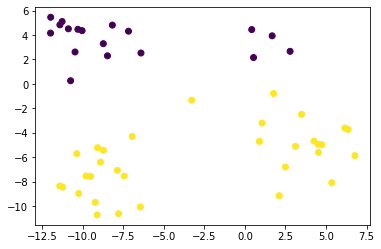

In [11]:
plt.scatter(x_train.numpy()[:, 0], x_train.numpy()[:, 1], c=y_train.numpy())
plt.scatter(x_test.numpy()[:, 0], x_test.numpy()[:, 1], c=(2+y_test.numpy()))

In [12]:
model = Feedforward(2, 10)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [13]:
model.eval()
y_pred = model(x_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.5932613611221313


In [14]:
model.train()
epochs = 20
for epoch in range(epochs):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.9701871871948242
Epoch 1: train loss: 0.8466216325759888
Epoch 2: train loss: 0.7429454922676086
Epoch 3: train loss: 0.6569477319717407
Epoch 4: train loss: 0.5858418941497803
Epoch 5: train loss: 0.5267720222473145
Epoch 6: train loss: 0.47735175490379333
Epoch 7: train loss: 0.4355399012565613
Epoch 8: train loss: 0.3999555706977844
Epoch 9: train loss: 0.3693874776363373
Epoch 10: train loss: 0.3428974449634552
Epoch 11: train loss: 0.3197614252567291
Epoch 12: train loss: 0.29940205812454224
Epoch 13: train loss: 0.28134405612945557
Epoch 14: train loss: 0.2652439475059509
Epoch 15: train loss: 0.25081178545951843
Epoch 16: train loss: 0.2378232181072235
Epoch 17: train loss: 0.2260616272687912
Epoch 18: train loss: 0.21536529064178467
Epoch 19: train loss: 0.2056000530719757


In [15]:
model.eval()
y_pred = model(x_test)
after_train = criterion(y_pred.squeeze(), y_test) 
print('Test loss after Training' , after_train.item())

Test loss after Training 0.550280749797821


## Практическое задание ко второму уроку
### Задание 1

 *загрузка датасета*

In [16]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=False)


image, label = train_dataset[0]
print (image.size())
print (label)

torch.Size([3, 32, 32])
6


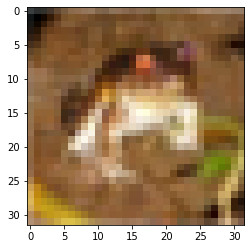

In [17]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [18]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [19]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                            train=False,
                                            download=False, 
                                            transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=4,
                                         shuffle=False)

In [20]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [21]:
3 * 32 * 32

3072

*Процесс обучения*

In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
print(device)

cpu


In [23]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x

net = Net().to(device) #to('cpu')

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [25]:
%%time
for epoch in range(30):  
    running_loss = 0.0
    n = 0
    for i, data in enumerate(train_loader, 0):
        inputs = data[0].to(device)
        labels = data[1].to(device)

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        n += labels.shape[0]
        
    print('[%d] loss: %.5f' % (epoch + 1, running_loss / n))

print('Training is finished!')

[1] loss: 0.02241
[2] loss: 0.01500
[3] loss: 0.01224
[4] loss: 0.01045
[5] loss: 0.00909
[6] loss: 0.00810
[7] loss: 0.00721
[8] loss: 0.00633
[9] loss: 0.00573
[10] loss: 0.00510
[11] loss: 0.00470
[12] loss: 0.00419
[13] loss: 0.00383
[14] loss: 0.00350
[15] loss: 0.00327
[16] loss: 0.00294
[17] loss: 0.00278
[18] loss: 0.00257
[19] loss: 0.00242
[20] loss: 0.00233
[21] loss: 0.00216
[22] loss: 0.00201
[23] loss: 0.00199
[24] loss: 0.00199
[25] loss: 0.00182
[26] loss: 0.00184
[27] loss: 0.00170
[28] loss: 0.00162
[29] loss: 0.00158
[30] loss: 0.00160
Training is finished!
Wall time: 5h 8min 24s


In [26]:
%%time
for epoch in range(20):  
    running_loss = 0.0
    n = 0
    for i, data in enumerate(train_loader, 0):
        inputs = data[0].to(device)
        labels = data[1].to(device)

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        n += labels.shape[0]
        
    print('[%d] loss: %.5f' % (epoch + 1, running_loss / n))

print('Training is finished!')

[1] loss: 0.00148
[2] loss: 0.00144
[3] loss: 0.00145
[4] loss: 0.00140
[5] loss: 0.00128
[6] loss: 0.00138
[7] loss: 0.00132
[8] loss: 0.00127
[9] loss: 0.00126
[10] loss: 0.00118
[11] loss: 0.00127
[12] loss: 0.00125
[13] loss: 0.00114
[14] loss: 0.00119
[15] loss: 0.00112
[16] loss: 0.00106
[17] loss: 0.00105
[18] loss: 0.00116
[19] loss: 0.00112
[20] loss: 0.00102
Training is finished!
Wall time: 3h 49min 35s


In [29]:
images, labels = iter(test_loader)
outputs = net(images.to(device))
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.to('cpu').permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%8s' % classes[labels[j]] for j in range(5)))

ValueError: too many values to unpack (expected 2)

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=False)


image, label = train_dataset[0]
print (image.size())
print (label)

In [ ]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [28]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%8s' % classes[predicted[j]] for j in range(5)))

TypeError: max() received an invalid combination of arguments - got (float, int), but expected one of:
 * (Tensor input)
 * (Tensor input, Tensor other, *, Tensor out)
 * (Tensor input, int dim, bool keepdim, *, tuple of Tensors out)
 * (Tensor input, name dim, bool keepdim, *, tuple of Tensors out)


In [ ]:
2

In [31]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_layer = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(128, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc_layer(x)
        return x


In [32]:
net2 = Net2()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())


In [33]:
x = Variable(torch.randn(1, 28, 28), requires_grad = True)
y = Variable(torch.randint(0, 10, (1,)), requires_grad = False)

In [34]:
for i in range(500):  
    optimizer.zero_grad()
    pred = net2(x)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        print('[%5d] loss: %.5f' % (i + 1, loss.item()))

print('Training is finished!')
print('y =', y)
print('pred =', pred)

[    1] loss: 2.31975
[  101] loss: 2.28894
[  201] loss: 2.30663
[  301] loss: 2.31672
[  401] loss: 2.30701
Training is finished!
y = tensor([7])
pred = tensor([[0.1362, 0.0802, 0.1173, 0.1208, 0.0951, 0.0955, 0.0935, 0.1031, 0.0658,
         0.0924]], grad_fn=<SoftmaxBackward0>)


In [ ]:
for epoch in tqdm(range(10)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

[1,     1] loss: 0.000
[1,   301] loss: 0.032
[1,   601] loss: 0.018


 10%|████████                                                                        | 1/10 [08:39<1:17:55, 519.47s/it]

[2,     1] loss: 0.000
[2,   301] loss: 0.010
[2,   601] loss: 0.012


 20%|████████████████                                                                | 2/10 [16:53<1:07:17, 504.72s/it]

[3,     1] loss: 0.000
[3,   301] loss: 0.010
[3,   601] loss: 0.010


 30%|████████████████████████▌                                                         | 3/10 [25:16<58:47, 503.97s/it]

[4,     1] loss: 0.000
